<a href="https://colab.research.google.com/github/utkarsh-chaurasia/Chronic-Kideny-Disease-using-UCI-Dataset/blob/main/CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#make necessary imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
import lux
#!pip install lux

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar
# !apt-get install unrar

# !unrar x Chronic_Kidney_Disease.rar

In [ ]:
# data = []
# with open('Chronic_Kidney_Disease/chronic_kidney_disease_full.arff', "r") as f:
#     for line in f:
#         line = line.replace('\n', '')
#         data.append(line.split(','))


# names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
#          'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
#          'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
#          'class', 'no_name']
    
# df = pd.DataFrame(data[145:], columns=names)
# df.head()

In [ ]:
df=pd.read_csv('/content/kidney_disease.csv')
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df.shape

(400, 26)

In [ ]:
#df = df.drop('no_name', axis=1)

In [ ]:
#find null values in the data set
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
# Impuing NULL values
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df_imputed.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
# finding Unique values in the columns

for i in df_imputed.columns:
  print("*****************************************************************************",i,"***********************************************************************************")
  print()
  print(set(df_imputed[i].tolist()))
  print()

***************************************************************************** id ***********************************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188

In [ ]:
 print(df_imputed["rc"].mode())
 print(df_imputed["wc"].mode())
 print(df_imputed["pcv"].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [ ]:

df_imputed["classification"]=df_imputed["classification"].apply(lambda x:'ckd' if x=='ckd\t' else x)

df_imputed["cad"]=df_imputed["cad"].apply(lambda x:'no' if x=='\tno' else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'no' if x=='\tno' else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=='\tyes' else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=='yes' else x)

df_imputed["rc"]=df_imputed["rc"].apply(lambda x:'5.2' if x=='\t?' else x)

df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t6200' else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t8400' else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t?' else x)

df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t43' else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t?' else x)



In [ ]:
# finding Unique values in the columns

for i in df_imputed.columns:
  print("*****************************************************************************",i,"***********************************************************************************")
  print()
  print(set(df_imputed[i].tolist()))
  print()

***************************************************************************** id ***********************************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188

Axes(0.125,0.11;0.775x0.77)


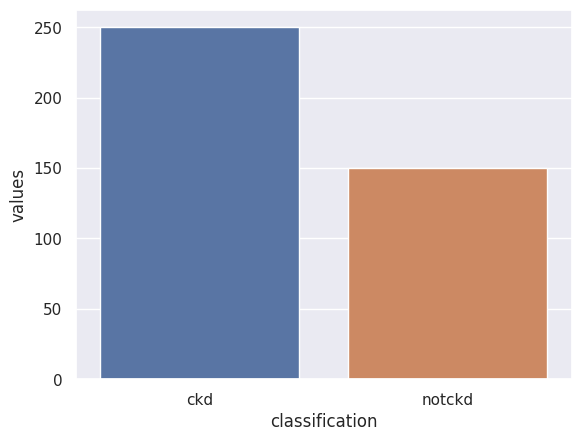

In [ ]:
#check Lable Imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp=df_imputed["classification"].value_counts()
temp_df=pd.DataFrame({'classification': temp.index,'values': temp.values})
print(sns.barplot(x='classification', y="values", data=temp_df))

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [ ]:
# Fixing data types

df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object


In [ ]:
for i in df.select_dtypes(exclude=["object"]).columns:
  df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [ ]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


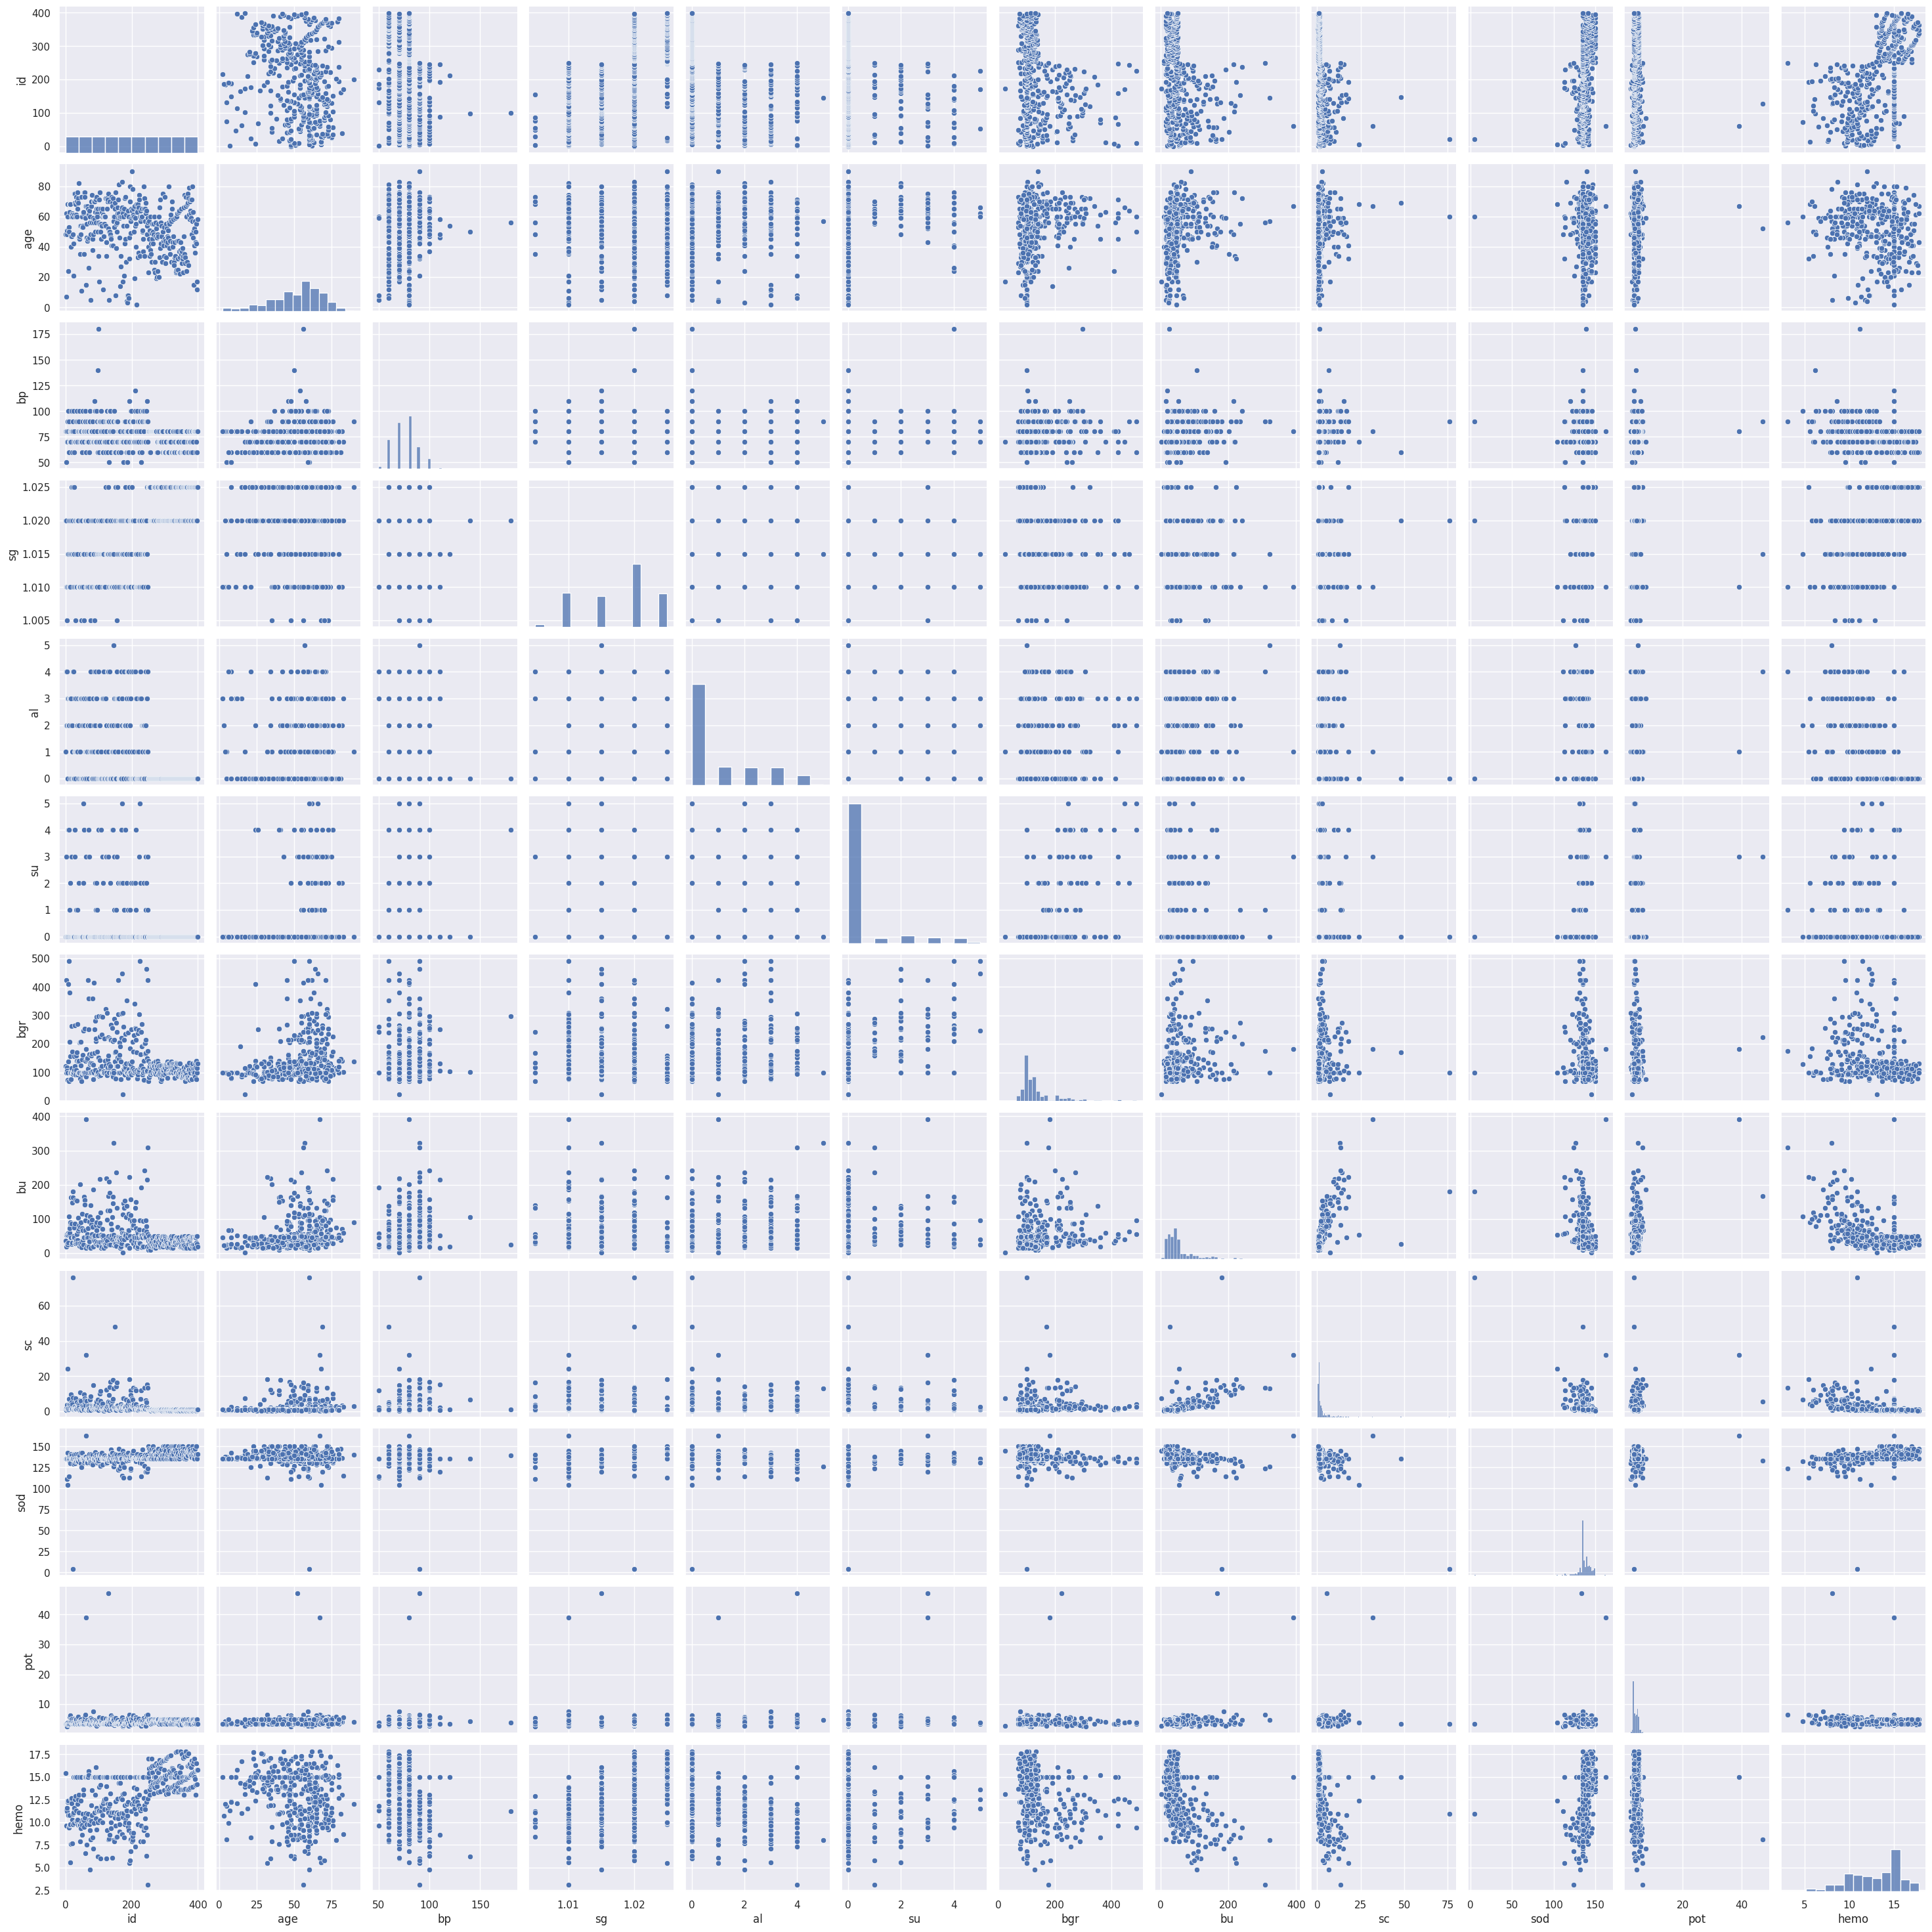

In [ ]:
sns.pairplot(df_imputed)

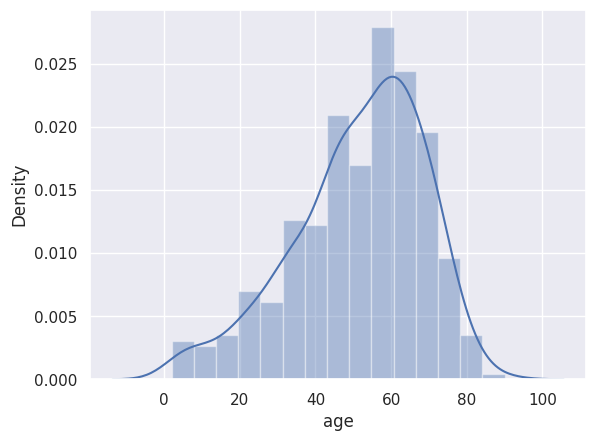

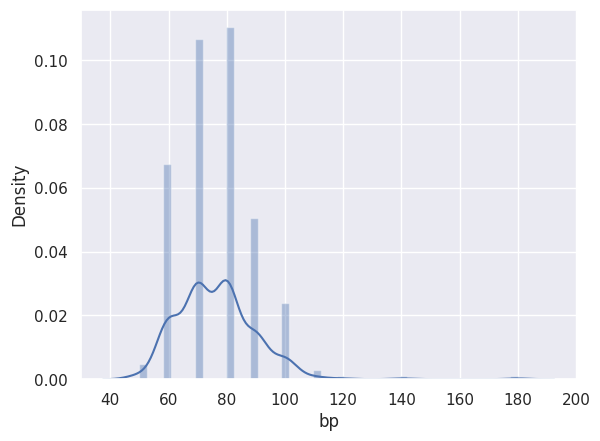

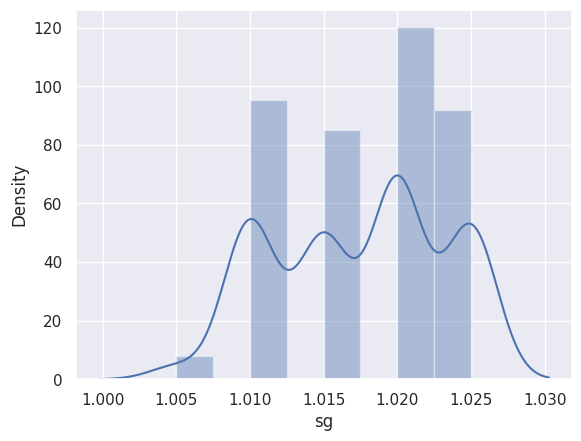

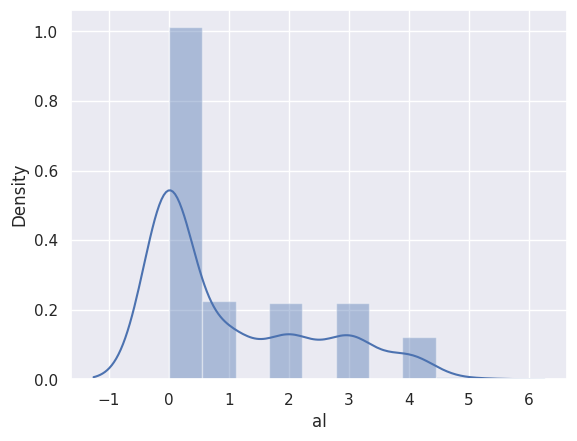

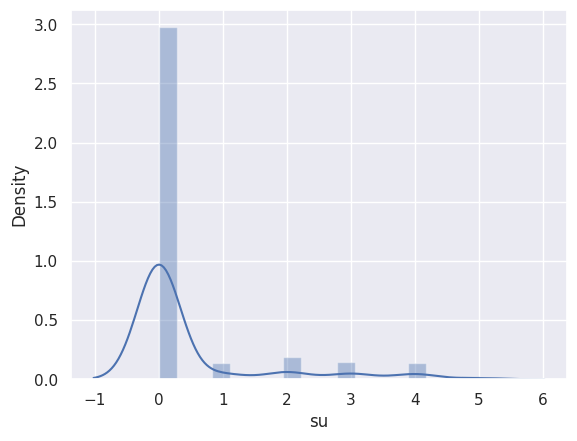

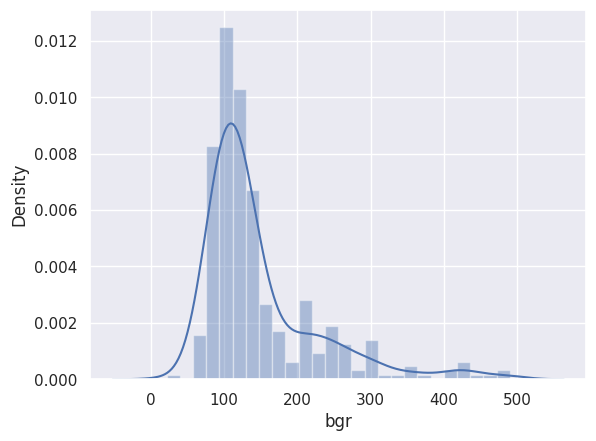

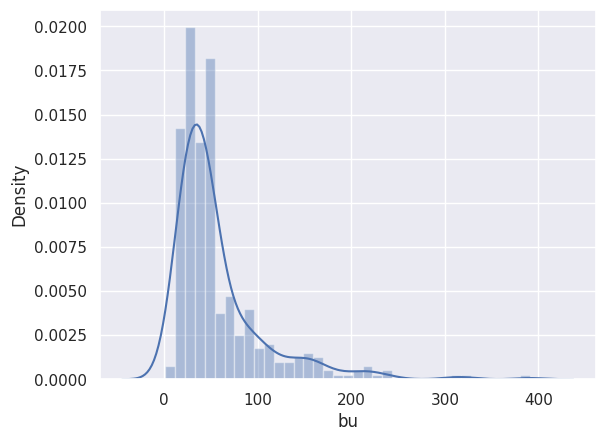

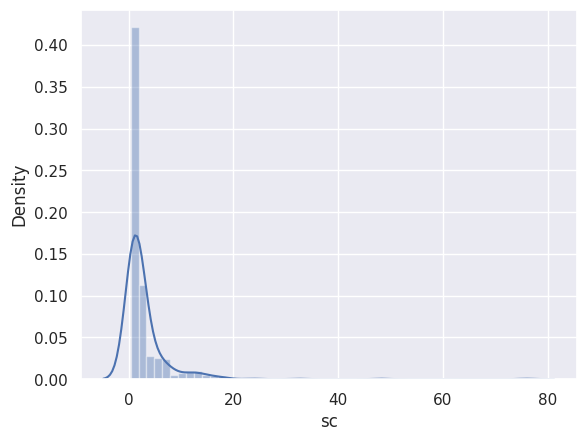

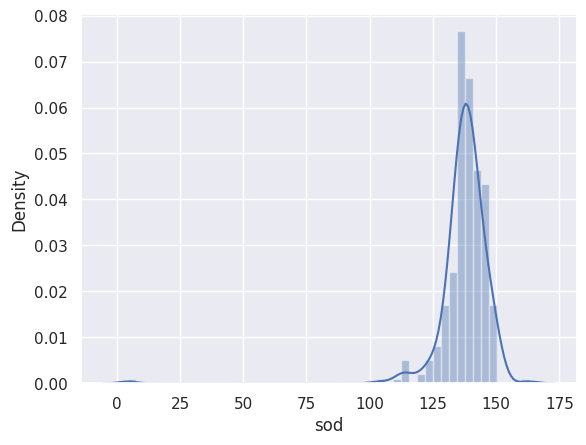

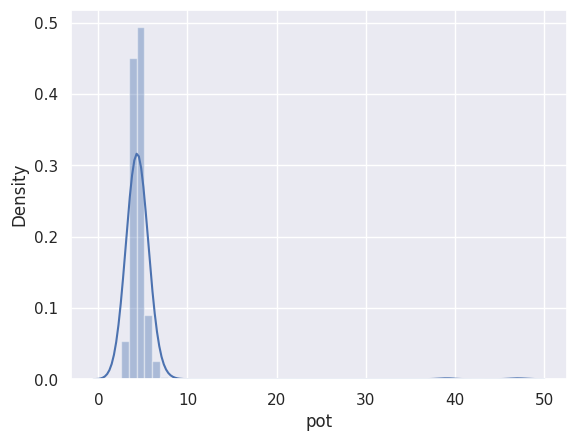

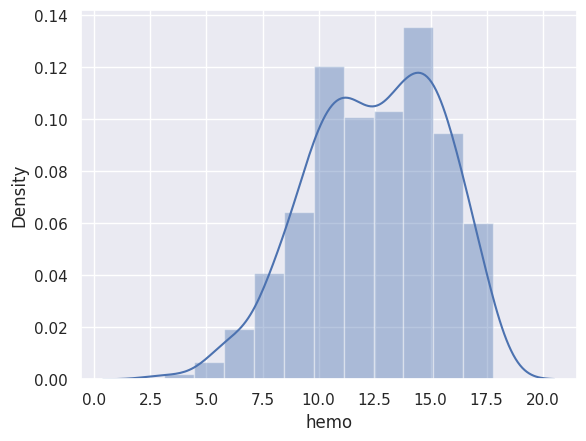

In [ ]:
# Find the distribution of data

def distplots(col):
  sns.distplot(df[col])
  plt.show()

for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
  distplots(i)  

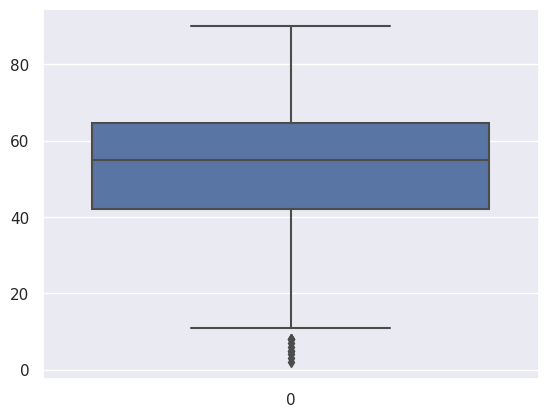

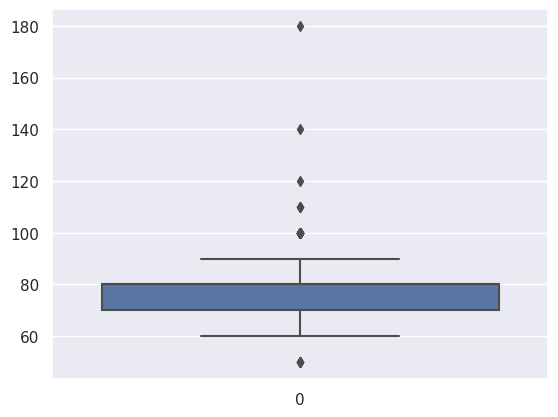

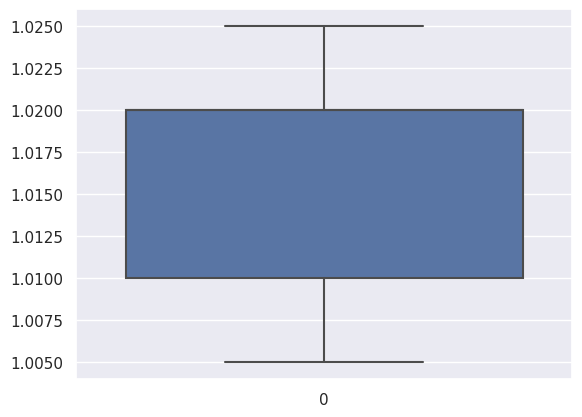

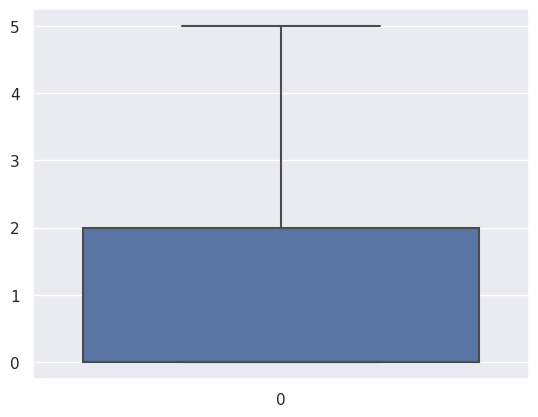

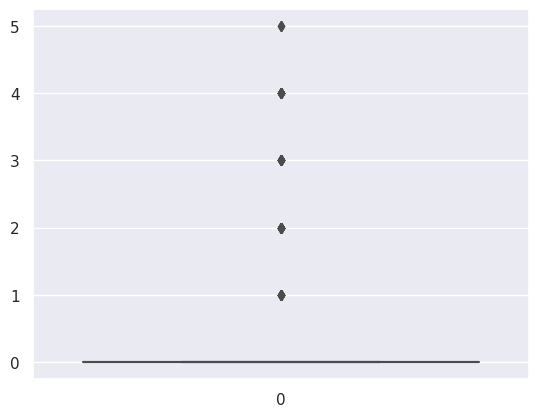

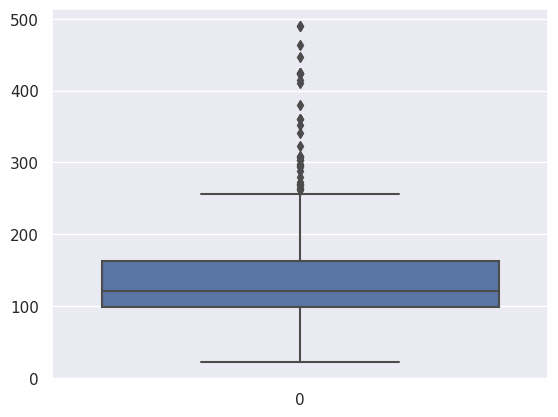

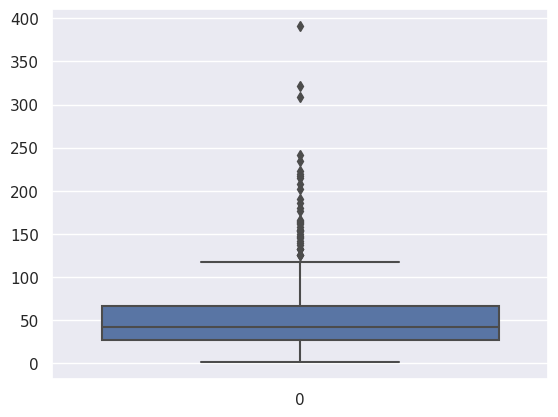

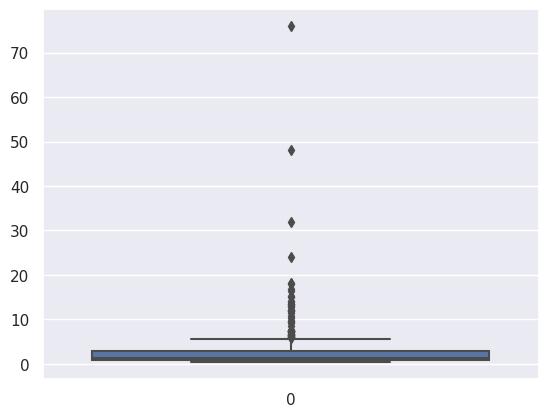

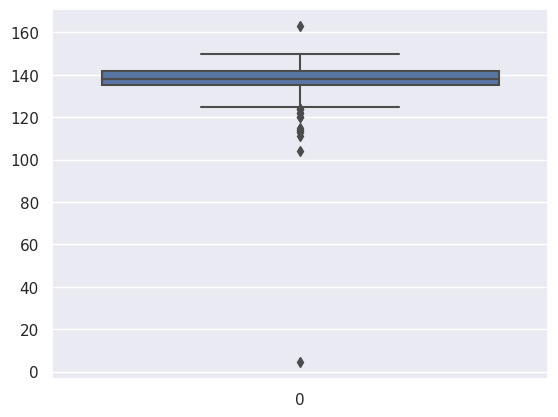

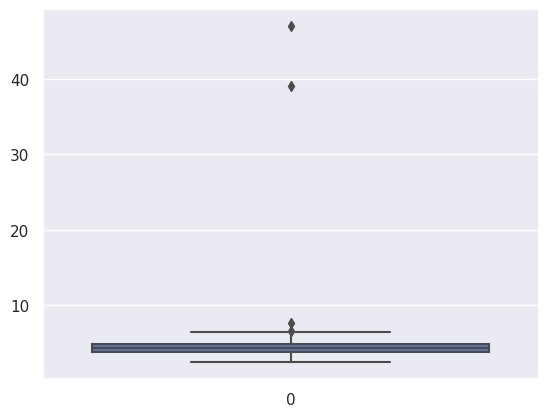

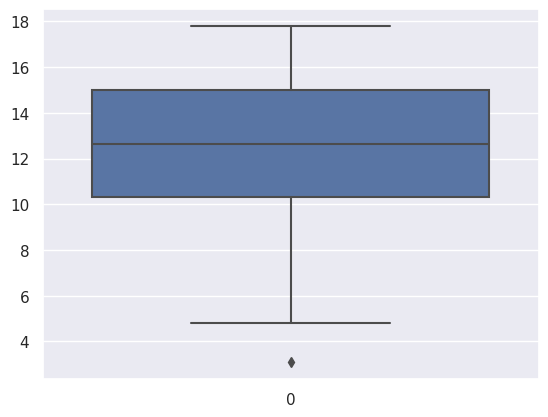

In [ ]:
# Find and remove outliers of data

def boxplots(col):
  sns.boxplot(df[col])
  plt.show()

for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
  boxplots(i)  

In [ ]:
# Label encoding to convert categorical values to numerical
from sklearn import preprocessing

df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df_enco.to_csv("/content/kidney_disease.csv")

<Axes: >

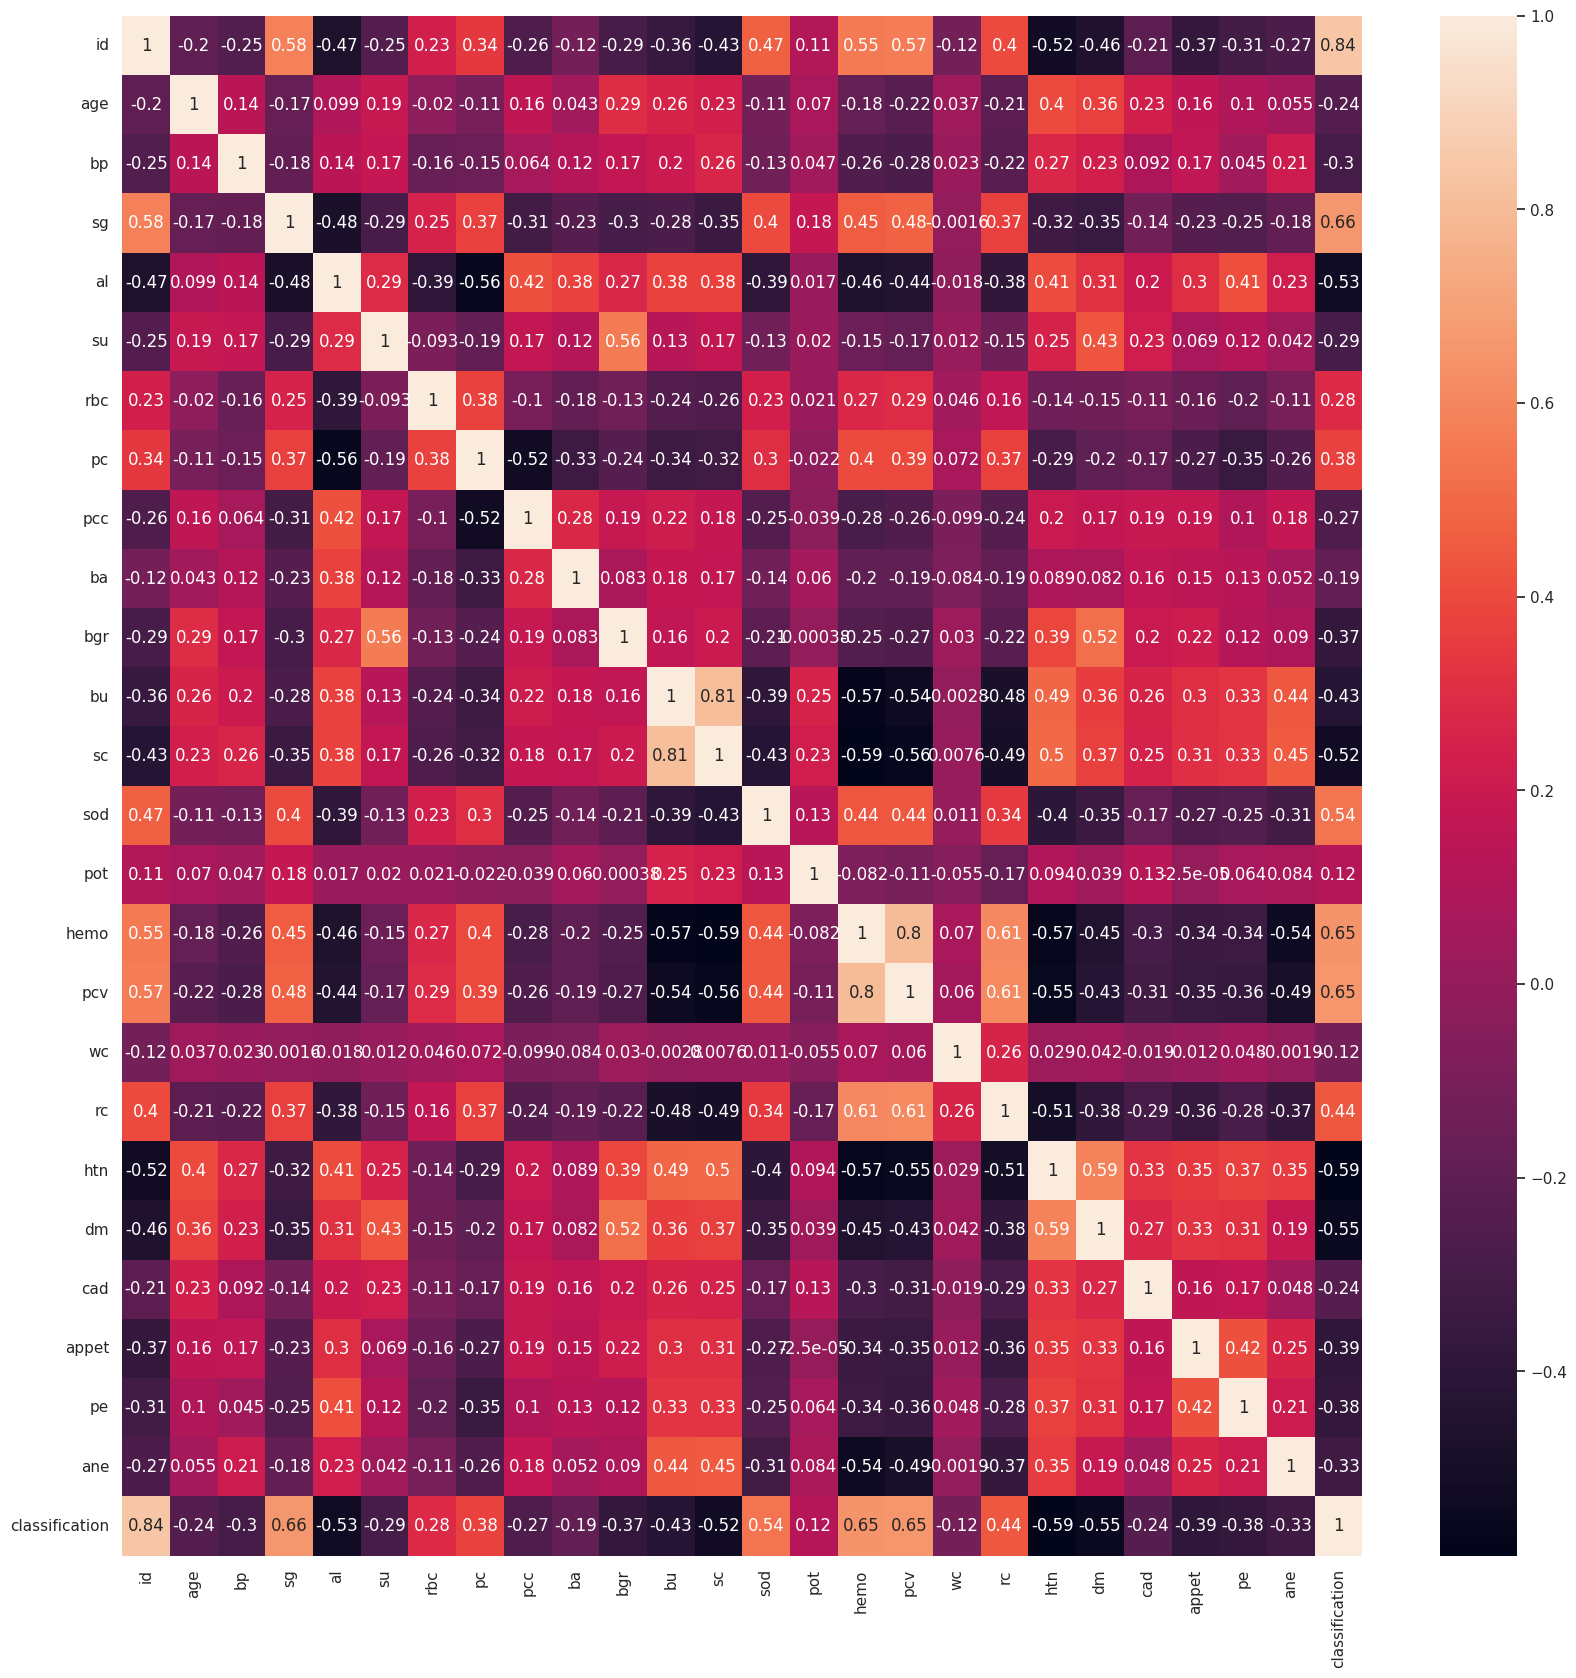

In [ ]:
# Finding Correlations

plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [ ]:
# Lets make some final changes to the data
# seperate independent and dependent variables and drop the ID column
X=df_enco.drop(["id","classification"],axis=1)
y=df_enco["classification"]

In [ ]:
# Lets detect the Label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 

print(Counter(y))

Counter({0: 250, 1: 150})


In [ ]:
# Lets balance the labels

ros= RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [ ]:
# scale the feature to between -1 and 1

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [ ]:
# Apply PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

pca=PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

# Thus we need 18 columns to keep 95% of the variance

(500, 24)
(500, 18)


In [ ]:
# with PCA
# Now, Split the dataset in to training and tsting sets keeping 20% of the data for testing. 
# Split the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)

In [84]:
import keras
# A Sequential mode is appropriate for a plan stack of layers has exactly one input tensor and one output tensor flow
# Tensor Flow
from keras.models import Sequential

# Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer.
from keras.layers import Dense

# The Dropout layer randomly set input unit to 0 with a frequency of rate at each setp during training time,
from keras.layers import Dropout

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model

# Optimizers are algorithms or methods used to change the attributes of the neural network such as weignt and learning rate.
# Adam optimization is an extension to stochastic gradient decent and can be used in place id classical stochastic gradient descese.
from keras.optimizers import Adam
from sklearn.model_selection import KFold

In [ ]:
# Creating the model

def model():
  classifier = Sequential()
  classifier.add(Dense(15, input_shape=(x_train.shape[1],), activation = 'relu'))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(15, activation = 'relu')) # The rectified linea actication function
  classifier.add(Dropout(0.4))
  classifier.add(Dense(1, activation = 'sigmoid')) # The main reason why wemuse sigmoid function is beacuse it exist
  classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy',metrics = ['accuracy'])

  return classifier


In [ ]:
x_train.shape

(400, 18)

In [ ]:
(x_train.shape[1]+1)*15

285

In [ ]:
model=model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=11, verbose=1)

Epoch 1/11
13/13 [==============================] - 0s 14ms/step - loss: 0.0949 - accuracy: 0.9900 - val_loss: 0.0507 - val_accuracy: 0.9900
Epoch 2/11
13/13 [==============================] - 0s 7ms/step - loss: 0.0832 - accuracy: 0.9875 - val_loss: 0.0468 - val_accuracy: 0.9900
Epoch 3/11
13/13 [==============================] - 0s 8ms/step - loss: 0.0895 - accuracy: 0.9800 - val_loss: 0.0436 - val_accuracy: 0.9900
Epoch 4/11
13/13 [==============================] - 0s 8ms/step - loss: 0.0747 - accuracy: 0.9850 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 5/11
13/13 [==============================] - 0s 4ms/step - loss: 0.0682 - accuracy: 0.9875 - val_loss: 0.0388 - val_accuracy: 0.9900
Epoch 6/11
13/13 [==============================] - 0s 6ms/step - loss: 0.0643 - accuracy: 0.9925 - val_loss: 0.0369 - val_accuracy: 0.9900
Epoch 7/11
13/13 [==============================] - 0s 6ms/step - loss: 0.0622 - accuracy: 0.9850 - val_loss: 0.0355 - val_accuracy: 0.9900
Epoch 8/11
13/13 [=

In [ ]:
#!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, confusion_matrix #plot_precision_recall_curve


#function to plot the roc_curve
def plot_auc(t_y, p_y):
  fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
  fig, c_ax = plt.subplots(1,1, figsize=(9,9))
  c_ax.plot(fpr, tpr, lablel = '%s (AUC:%0.2f)' %('classificaton', auc(fpr,tpr)))
  c_ax.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
  c_ax.legend()
  c_ax.set_xlablel('False Positive Rate')
  c_ax.set_xlablel('True Positive Rate')

# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve_helper(t_y, p_y):
  fig, c_ax= plt.subplots(1,1,figsize=(9,9)) 
  precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
  aps=average_precision_score(t_y, p_y)
  c_ax.plot(recall, precision, label= '%s(AP Score:%0.2f)' % ('classification',aps))
  c_ax.plot(recall, precision, color='red', lw=2)
  c_ax.legend()
  c_ax.set_xlabel('Recall')
  c_ax.set_ylabel('Precision')

# function to plot the history
def plot_history(history):
     f=plt.figure()
     f.set_figwidth(15)

     f.add_subplot(1, 2, 1)
     plt.plot(history.history['val_loss'], label='val loss')
     plt.plot(history.history['loss'], label='train loss')
     plt.legend()
     plt.title("Modell Loss")

     f.add_subplot(1, 2, 2)
     plt.plot(history.history['val_accuracy'], label='val accuracy')
     plt.plot(history.history['accuracy'], label='train accuracy')
     plt.legend()
     plt.title("Modell Accuracy")

     plt.show()

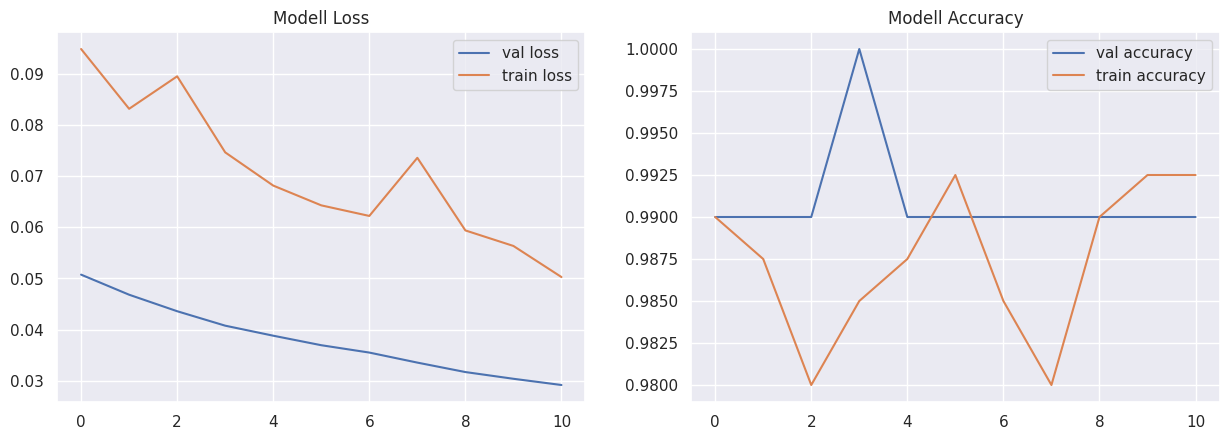

In [86]:
hist = plot_history(history)

4/4 [==============================] - 0s 3ms/step


AttributeError: ignored

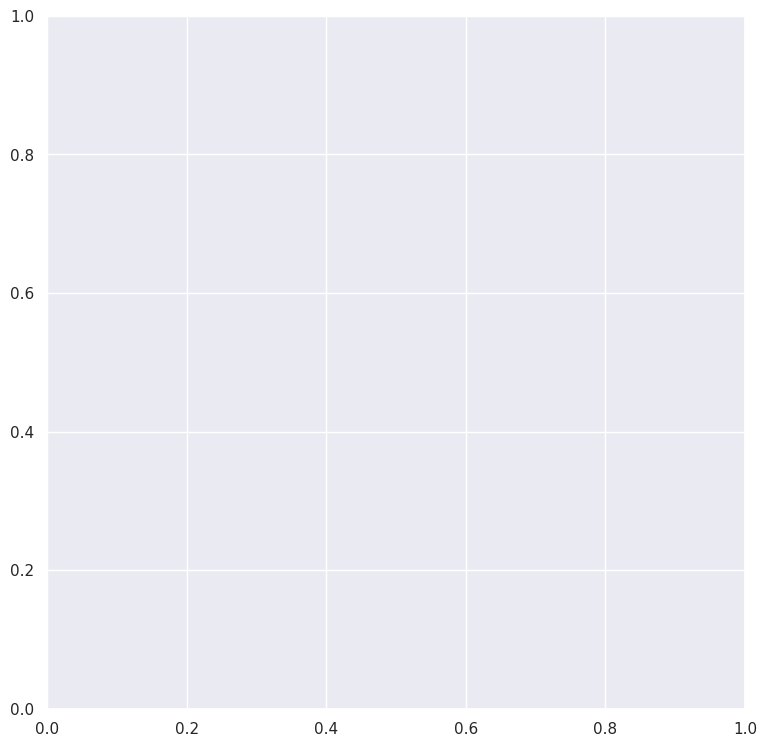

In [87]:
plot_auc(y_test, model.predict(x_test, verbose = True))

4/4 [==============================] - 0s 3ms/step


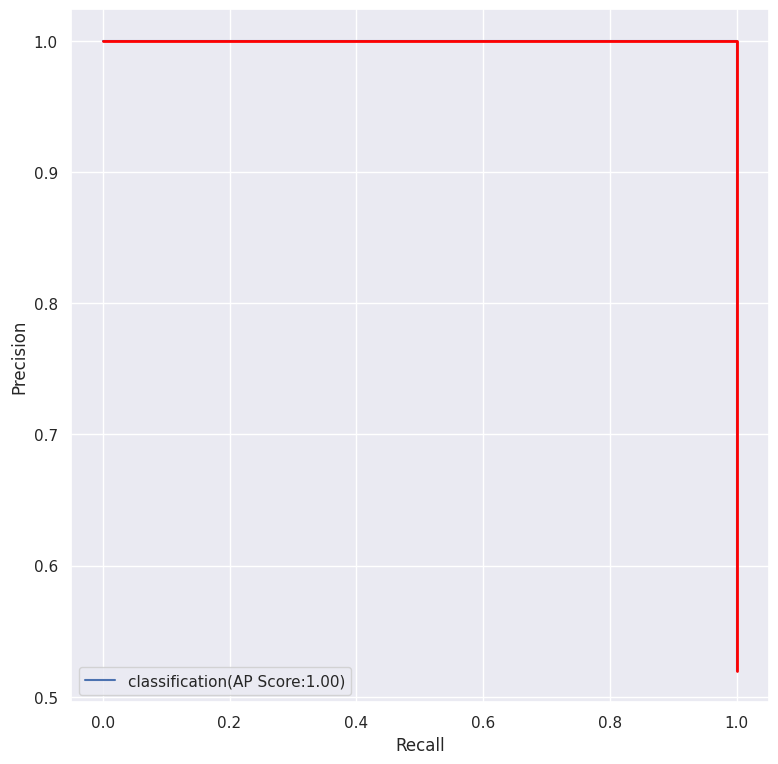

In [88]:
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose = True))

In [89]:
def calc_f1(prec, recall):
  return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds =precision_recall_curve(y_test, model.predict(x_test, verbose= True))
f1score=[calc_f1(precision[i],recall[i])for i in range(len(thresholds))]
idx= np.argmax(f1score)
threshold = thresholds[idx]
print('****************************************************************')
print('Precision: '+ str(precision[idx]))
print('Recall: '+ str(recall[idx]))
print('Threshold: '+ str(thresholds[idx]))
print('F1 Score: '+ str(f1score[idx]))

4/4 [==============================] - 0s 3ms/step
****************************************************************
Precision: 1.0
Recall: 1.0
Threshold: 0.8234181
F1 Score: 1.0


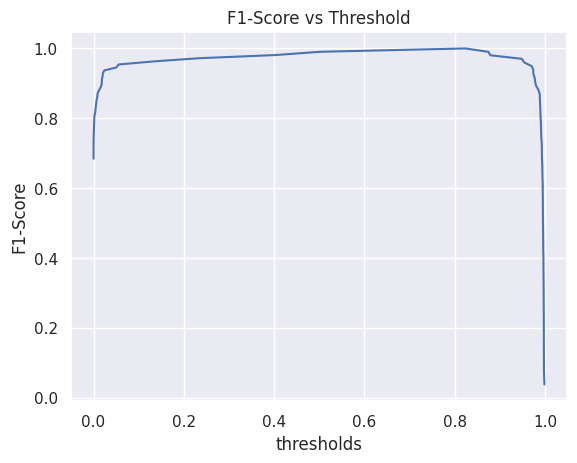

In [90]:
plt.figure()
plt.plot(thresholds,f1score)
plt.title("F1-Score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("F1-Score")
plt.show()